# Fix pathing

In [1]:
import sys


sys.path.append("../..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))))


# Imports

In [3]:
import json
import matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Constants

In [4]:
FOLDER_NAMES = ["ex_2_least_GA", "ex_2_avg_GA", "ex_2_most_GA"]
LABELS = ["Lowest Activity", "Average Activity", "Highest Activity"]
COLORS = [sns.color_palette("deep")[2], sns.color_palette("deep")[0], sns.color_palette("deep")[3]]

FOLDER_PATH = os.path.join(os.path.dirname(constants.PROJECT_DIRECTORY_PATH), "Simulator", "data")


# Methods

In [5]:
def load_json():
    datasets = []
    for folder_name in FOLDER_NAMES:
        dataset = []
        for ts in range(1, 24):
            with open(os.path.join(FOLDER_PATH, folder_name, "heuristic_ts=" + str(ts) + ".json"), 'r') as file:
                dataset.append(json.load(file))
        datasets.append(dataset)

    return datasets


In [14]:
def plot_fitness_for_objects(datasets, degree=2):
    plt.figure(figsize=(12, 6))

    all_fitness = []

    for dataset, label, color in zip(datasets, LABELS, COLORS):
        fitness = [data_object['fitness'][-1][0] * 100 for data_object in dataset]
        all_fitness.append(fitness)
        time_segments = list(range(1, len(fitness) + 1))

        # Determine the minimum fitness value and all indices where it occurs
        min_fitness_value = min(fitness)
        min_indices = [i for i, val in enumerate(fitness) if val == min_fitness_value]

        # Exclude the minimum points from the initial scatter plot
        all_points = [(time, fit) for time, fit in zip(time_segments, fitness) if fit != min_fitness_value]
        times, fits = zip(*all_points) if all_points else ([], [])
        plt.scatter(times, fits, color=color, label=f"{label}")

        # Fit and plot a polynomial
        coeffs = np.polyfit(time_segments, fitness, degree)
        polynomial = np.poly1d(coeffs)
        plt.plot(time_segments, polynomial(time_segments), color=color)

        # Highlight all occurrences of the minimum fitness value with a marker
        for min_index in min_indices:
            plt.scatter(time_segments[min_index], min_fitness_value, color=color, s=80, edgecolor='k', zorder=5, marker='^')

    # Calculate and plot the average fitness per time segment
    fitness = [sum(f) / len(f) for f in zip(*all_fitness)]
    time_segments = list(range(1, len(fitness) + 1))
    plt.scatter(time_segments, fitness, color=sns.color_palette("deep")[7], label='Average Fitness')

    coeffs = np.polyfit(time_segments, fitness, degree)
    polynomial = np.poly1d(coeffs)
    plt.plot(time_segments, polynomial(time_segments), "--", color="black")

    # Determine the best overall time segment
    best_time_segment = fitness.index(min(fitness))
    plt.axvline(x=best_time_segment, color='purple', linestyle='-.', label=f'Best Number of Time Segments: {best_time_segment}')

    plt.xlabel('Number of Time Segments')
    plt.ylabel('Violations (%)')
    plt.ylim(bottom=0, top=29)
    title = 'Best Fitness Over Number of Time Segments'
    plt.title(title, fontdict=constants.FONT_PROPERTIES_SUB_HEADER)
    plt.grid(True)
    plt.legend(loc="upper left")

    plt.savefig(os.path.join(constants.PROJECT_DIRECTORY_PATH, "source", "analysis", "plots", title + ".png"), dpi=300, bbox_inches='tight')

    plt.show()


# Main

In [7]:
datasets = load_json()

for key, value in datasets[0][0].items():
    print(key)


avg_response_time_rural_a
avg_response_time_rural_h
avg_response_time_rural_v1
avg_response_time_urban_a
avg_response_time_urban_h
avg_response_time_urban_v1
diversity
fitness
percentage_violations
percentage_violations_rural
percentage_violations_urban


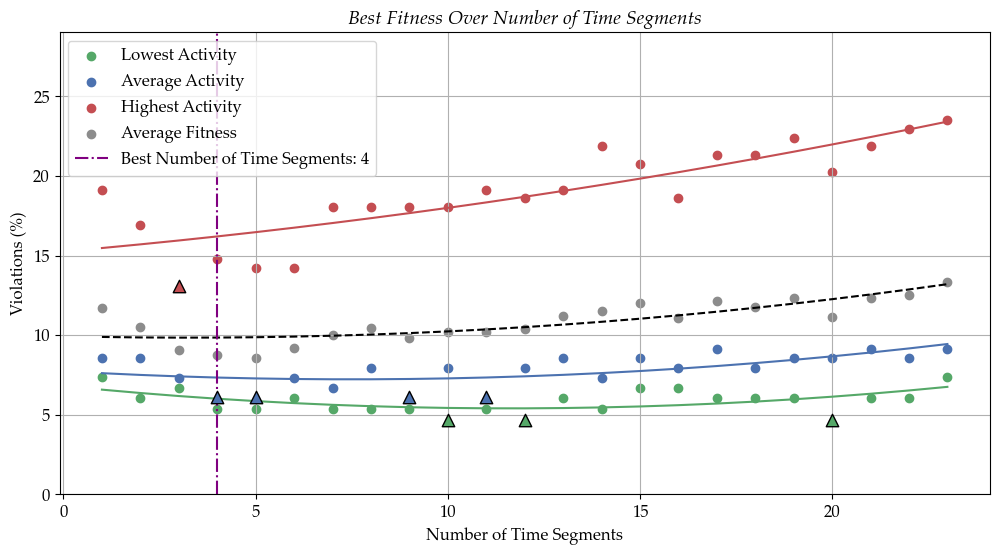

In [15]:
plot_fitness_for_objects(datasets, degree=2)


In [9]:
fitness_lowest = np.array([0.0738255, 0.0604027, 0.0671141, 0.0536913, 0.0536913, 0.0604027, 0.0536913, 0.0536913, 0.0536913, 0.0469799, 0.0536913, 0.0469799, 0.0604027, 0.0536913, 0.0671141, 0.0671141, 0.0604027, 0.0604027, 0.0604027, 0.0469799, 0.0604027, 0.0604027, 0.0738255])
fitness_average = np.array([0.0853659, 0.0853659, 0.0731707, 0.0609756, 0.0609756, 0.0731707, 0.0670732, 0.0792683, 0.0609756, 0.0792683, 0.0609756, 0.0792683, 0.0853659, 0.0731707, 0.0853659, 0.0792683, 0.0914634, 0.0792683, 0.0853659, 0.0853659, 0.0914634, 0.0853659, 0.0914634])
fitness_highest = np.array([0.191257, 0.169399, 0.131148, 0.147541, 0.142077, 0.142077, 0.180328, 0.180328, 0.180328, 0.180328, 0.191257, 0.185792, 0.191257, 0.218579, 0.20765, 0.185792, 0.213115, 0.213115, 0.224044, 0.202186, 0.218579, 0.229508, 0.234973])

mean_lowest = np.mean(fitness_lowest)
std_lowest = np.std(fitness_lowest)
mean_average = np.mean(fitness_average)
std_average = np.std(fitness_average)
mean_highest = np.mean(fitness_highest)
std_highest = np.std(fitness_highest)

print("Lowest Activity: Mean =", mean_lowest, ", Standard Deviation =", std_lowest)
print("Average Activity: Mean =", mean_average, ", Standard Deviation =", std_average)
print("Highest Activity: Mean =", mean_highest, ", Standard Deviation =", std_highest)


print("Lowest Activity: Min =", np.min(fitness_lowest), "TS =", np.where(fitness_lowest == np.min(fitness_lowest))[0] + 1)
print("Average Activity: Min =", np.min(fitness_average), "TS =", np.where(fitness_average == np.min(fitness_average))[0] + 1)
print("Highest Activity: Min =", np.min(fitness_highest), "TS =", np.where(fitness_highest == np.min(fitness_highest))[0] + 1)


Lowest Activity: Mean = 0.0586519 , Standard Deviation = 0.007462325037144925
Average Activity: Mean = 0.07820785652173914 , Standard Deviation = 0.00995493362124163
Highest Activity: Mean = 0.18959382608695655 , Standard Deviation = 0.028436884296481803
Lowest Activity: Min = 0.0469799 TS = [10 12 20]
Average Activity: Min = 0.0609756 TS = [ 4  5  9 11]
Highest Activity: Min = 0.131148 TS = [3]
